# Lab 3

Họ và tên: **Phạm Thiện Bảo**

MSSV: **20521107**

Lớp: **CS232.N21.KHCL**

In [29]:
# Import library
import pandas as pd
from configparser import ConfigParser
import mysql.connector
from lxml import etree as ET
import numpy as np

In [12]:
# Using MySQL to store data
# Connecting to mysql
connect = mysql.connector.connect(user='root', password='Bao2002*',
                                  host='localhost',database='data')

# check database connection
if connect:
    print ("Connected Successfully")
else:
    print ("Failed Connection")

Connected Successfully


In [13]:
# ELEMENTS is name of table
ELEMENTS = ['article', 'inproceedings', 'proceedings', 'book', 'incollection', 'phdthesis', 'mastersthesis', 'www']

# FEATURES is attribute of table
FEATURES = ['author', 'title', 'school', 'year', 'pages', 'ee', 'publisher', 'booktitle', 'address', 'journal', 'volume', 
            'number', 'month', 'url','cdrom', 'editor', 'cite', 'note', 'crossref', 'isbn', 'series', 'chapter', 'publnr']

In [14]:
def handle_coincided(tag, text, value):
    tag_cp = tag.copy()
    text_cp = text.copy()
    count = tag_cp.count(value)
    index = tag_cp.index(value)

    list_connect = []
    for i in range(index, index + count):
        list_connect.append(text_cp[i])
    
    list_connect = ', '.join(list_connect)
    for i in range(count - 1):
        tag_cp.remove(value)
    
    for i in range(index, index + count):
        text_cp.remove(text[i])
    
    text_cp.insert(index, list_connect)
    return tag_cp, text_cp

In [15]:
def parse_XML_ELEMENT(value, num_features):
    tree = ET.iterparse('D:\Desktop\CS232\Lab3_ParseXML\dblp.xml', load_dtd=True)
    tags = []
    texts = []
    count = 0
    df = pd.DataFrame(columns = FEATURES)

    for _, element in tree:
        if(element.tag in FEATURES):
            tags.append(element.tag)
            texts.append(element.text)
        elif(element.tag in ELEMENTS):
            if(element.tag == value):
                try:
                    tags.append('ELM')
                    texts.append(element.tag)

                    unique = list(set(tags))
                    for i in unique:
                        if(tags.count(i) > 1):
                            tags, texts = handle_coincided(tags, texts, i)
                    arr = []
                    for i in range(len(FEATURES)):
                        if(FEATURES[i] in tags):
                            index = tags.index(FEATURES[i])
                            arr.append(texts[index])
                        else:
                            arr.append('Null')
                    keys = FEATURES
                    items = arr
                    data = dict(zip(keys, items))
                    df = df.append(data, ignore_index=True)
                    count = count + 1
                except:
                    pass

                if(count == num_features): 
                    break

            tags = []
            texts = []
        
        element.clear()
        while element.getprevious() is not None:
            del element.getparent()[0]  
    return df

In [16]:
%cd D:\Desktop\CS232\Lab3_ParseXML

D:\Desktop\CS232\Lab3_ParseXML


In [ ]:
# Parsing ELEMENTS in XML file, each element we choose 5000 samples and same element dataframe into csv file
for i in ELEMENTS:
    df= parse_XML_ELEMENT(i, 5000)
    df.to_csv(f'./{i}.csv', index = False) 

In [18]:
# declare 'cursor' to execute statements to communicate with the MySQL database.
cursor = connect.cursor()

In [10]:
# create table for ELEMENTS
# for i in ELEMENTS:
#     cursor.execute(f'''CREATE TABLE {i}( 
#                 author   varchar(500), 
#                 title   varchar(1000), 
#                 school   varchar(100),
#                 year   varchar(4),
#                 pages   varchar(100),
#                 ee   varchar(1000),
#                 publisher   varchar(1000),
#                 booktitle   varchar(1000),
#                 address   varchar(1000),
#                 journal   varchar(1000),
#                 volume   varchar(1000),
#                 number   varchar(1000),
#                 month   varchar(1000),
#                 url   varchar(1000),
#                 cdrom   varchar(1000),
#                 editor   varchar(1000),
#                 cite   varchar(100),
#                 note   varchar(100),
#                 crossref   varchar(100),
#                 isbn   varchar(100),
#                 series   varchar(100),
#                 chapter   varchar(100),
#                 publnr   varchar(100))''')

In [19]:
%cd D:\Desktop\CS232\Lab3_ParseXML

D:\Desktop\CS232\Lab3_ParseXML


In [20]:
# When we have element's csv file, we can insert it into element table
# Storing book.csv to book table
empdata = pd.read_csv('./book.csv', index_col=False, delimiter = ',')
empdata.head()

,author,title,school,year,pages,ee,publisher,booktitle,address,journal,...,url,cdrom,editor,cite,note,crossref,isbn,series,chapter,publnr
0,Alberto Maria Metelli,Exploiting environment configurability in rein...,"Polytechnic University of Milan, Italy",2022,Null,"https://doi.org/10.3233/FAIA361, https://hdl.h...","2022, IOS Press",Null,Null,Null,...,Null,Null,Null,Null,Null,Null,"978-1-64368-362-1, 978-1-64368-363-8",Frontiers in Artificial Intelligence and Appli...,Null,Null
1,Markus Aleksy,Realizing the leasing concept in distributed s...,"Tokyo Denki University, Japan",2007,Null,"https://ci.nii.ac.jp/naid/500000450913, http:/...",Null,Null,Null,Null,...,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null
2,Michael A. Curth,Planspieltechnik und Computer-based-Training z...,Null,1989,1-370,https://d-nb.info/891654135,"Eul, Germany",Null,Null,Null,...,Null,Null,Null,Null,Null,Null,978-3-89012-177-2,Null,Null,Null
3,Eberhard E. Wedekind,Informationsmanagement in der Organisationspla...,Null,1988,1-240,https://d-nb.info/880936800,Dt. Univ.-Verlag,Null,Null,Null,...,Null,Null,Null,Null,Null,Null,978-3-8244-0003-4,Null,Null,Null
4,Peter F. Tropschuh,Rechnerunterstützung für das Projektieren mit ...,Null,1989,1-141,https://d-nb.info/890277257,Hanser,Null,Null,Null,...,Null,Null,Null,Null,Null,Null,978-3-446-15577-0,Null,Null,Null


In [ ]:
for i,row in empdata.iterrows():
    # %s means string value, data.book means inserting value to 'book' table in 'data' database
    sql = "INSERT INTO data.book VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    cursor.execute(sql, list(row))
    # print("Record inserted")
    # the connection is not auto committed by default, so we must commit to save our changes
    connect.commit()

**Result of book's table in database**

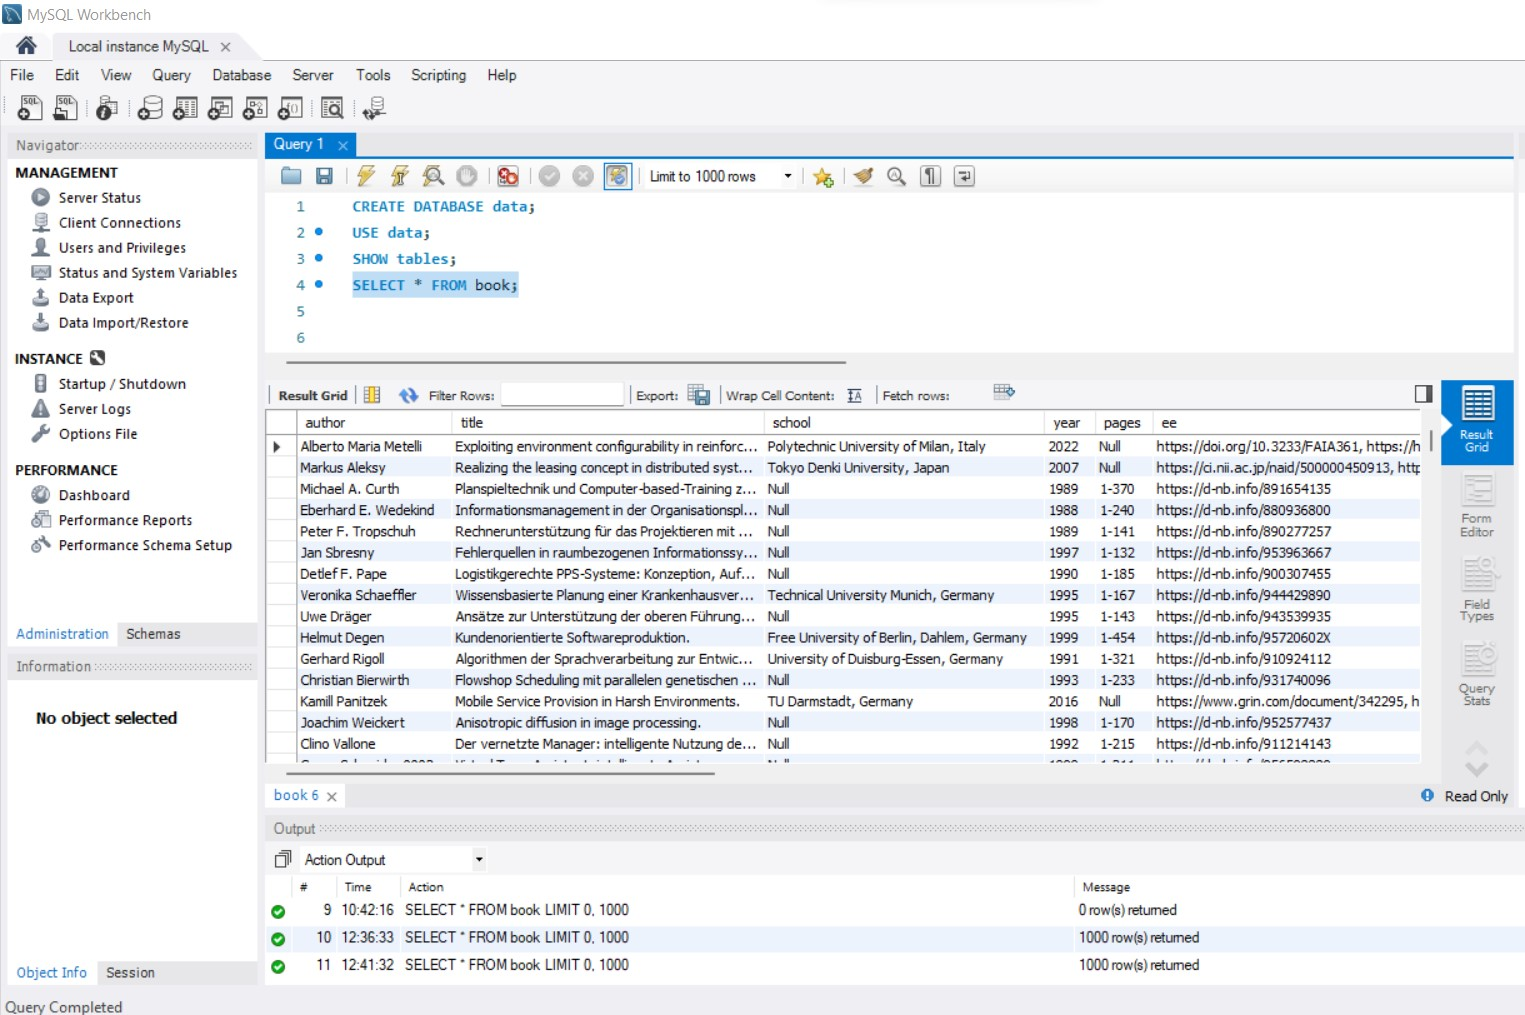